[View in Colaboratory](https://colab.research.google.com/github/robmarkcole/robins-google-colaboratory/blob/master/Getting_started_with_pytorch.ipynb)

work through https://medium.com/@chsafouane/getting-started-with-pytorch-on-google-colab-811c59a656b6

The good news about Colab is that Google offers a Tesla K80 GPU. One can keep working with the GPU instance continuously up to 12 hours

We can also work through the tutorials on https://notebooks.azure.com/pytorch

In [1]:
!pip3 install torch torchvision

    100% |████████████████████████████████| 519.5MB 34kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x592c6000 @  0x7fb7402bf1c4 0x46d6a4 0x5fcbcc 0x4c494d 0x54f3c4 0x553aaf 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54e4c8
    100% |████████████████████████████████| 61kB 20.4MB/s 
    100% |████████████████████████████████| 2.0MB 4.2MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


In [0]:
import torch

In [4]:
torch.__version__

'0.4.1'

Lets follow the tutorials on pytorch https://pytorch.org/tutorials/

WHAT IS PYTORCH?
It’s a Python-based scientific computing package targeted at two sets of audiences:

* A replacement for NumPy to use the power of GPUs
* a deep learning research platform that provides maximum flexibility and speed

In [5]:
x = torch.empty(5, 3)
print(x)

tensor([[0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000]])


In [6]:
print(x.size())

torch.Size([5, 3])


In [7]:
y = torch.rand(5, 3)
print(x + y)

tensor([[0.9888, 0.9560, 0.8291],
        [0.9076, 0.0924, 0.8363],
        [0.7985, 0.8864, 0.9040],
        [0.4822, 0.3815, 0.0678],
        [0.8329, 0.6418, 0.4497]])


In [8]:
print(x[:, 1])

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


In [9]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


## Converting a Torch Tensor to a NumPy Array

In [10]:
a = torch.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


In [11]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1.]


## CUDA TENSORS
Tensors can be moved onto any device using the .to method.

In [12]:
# let us run this cell only if CUDA is available
# We will use ``torch.device`` objects to move tensors in and out of GPU
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together!

tensor([[-1.0558,  1.1853,  0.6714, -0.8438],
        [ 2.3848,  1.1295,  3.0584,  0.5120],
        [ 0.5200,  0.8300,  0.1142,  0.9183],
        [-1.1471,  0.4829, -0.0223,  0.5914]], device='cuda:0')
tensor([[-1.0558,  1.1853,  0.6714, -0.8438],
        [ 2.3848,  1.1295,  3.0584,  0.5120],
        [ 0.5200,  0.8300,  0.1142,  0.9183],
        [-1.1471,  0.4829, -0.0223,  0.5914]], dtype=torch.float64)


CUDA is a parallel computing platform and application programming interface (API) model created by Nvidia.[1] It allows software developers and software engineers to use a CUDA-enabled graphics processing unit (GPU) for general purpose processing 

## Training a classifier
http://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

In [0]:
import torchvision
import torchvision.transforms as transforms

In [14]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


In [15]:
ls

data/  sample_data/


In [16]:
ls data/

cifar-10-batches-py/  cifar-10-python.tar.gz


In [17]:
ls data/cifar-10-batches-py/

batches.meta  data_batch_2  data_batch_4  readme.html
data_batch_1  data_batch_3  data_batch_5  test_batch


 bird horse horse  ship


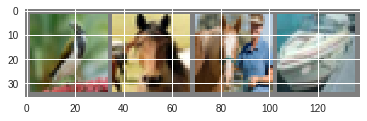

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [21]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


[1,  2000] loss: 2.221
[1,  4000] loss: 1.849
[1,  6000] loss: 1.682
[1,  8000] loss: 1.592
[1, 10000] loss: 1.525
[1, 12000] loss: 1.470
[2,  2000] loss: 1.411
[2,  4000] loss: 1.394
[2,  6000] loss: 1.349
[2,  8000] loss: 1.337
[2, 10000] loss: 1.321
[2, 12000] loss: 1.283
Finished Training


In [0]:
dataiter = iter(testloader)
images, labels = dataiter.next()

GroundTruth:    cat  ship  ship plane


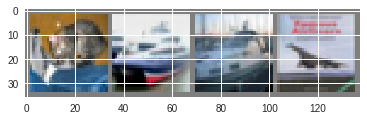

In [24]:
# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
outputs = net(Variable(images))

In [26]:
_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat plane  ship plane


In [27]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 55 %
